<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/data_science/circular_stacked_barplot/circular_stacked_barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circular stacked barplot

Based on reference [1]

## 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Functions

In [2]:
# reference [1]

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment


def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

# 3. Build a dataset

In [3]:
# based on reference [1]

# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)

# Build a dataset
df = pd.DataFrame({
    "label": 3*[f"item {i}" for i in range(1, 18)],
    "value_1": rng.integers(low=30, high=100, size=51),
    "value_2": rng.integers(low=30, high=100, size=51),
    "value_3": rng.integers(low=30, high=100, size=51),
    "group": ["A"] * 17 + ["B"] * 17 + ["C"] * 17
})

# Show 5 first rows
df.head()

,label,value_1,value_2,value_3,group
0,item 1,31,31,48,A
1,item 2,77,40,48,A
2,item 3,71,62,56,A
3,item 4,33,35,30,A
4,item 5,93,80,60,A


## 4. Circular stacked barplot

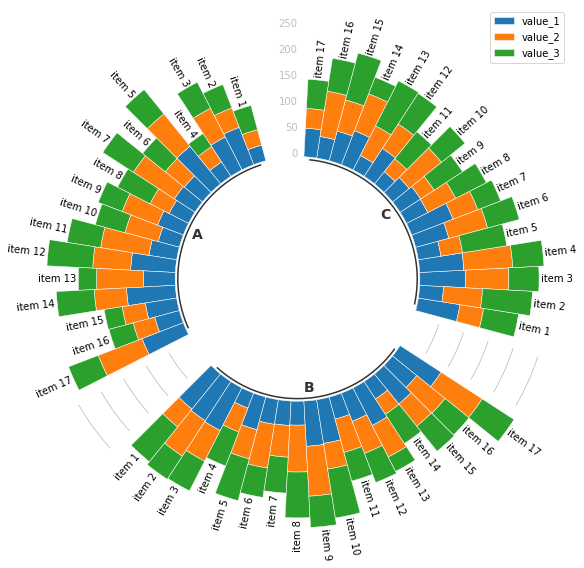

In [4]:
# based on reference [1]

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

LABELS = df["label"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(df) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# group size and label
group_size = df['group'].value_counts()\
.to_frame()\
.reset_index()\
.rename(columns = {'index':'group', 'group':'size'})\
.sort_values('group')

GROUPS_LABEL = group_size['group'].values
GROUPS_SIZE = group_size['size'].values

offset = 0
IDXS = []

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# get columns value_1, value_2, ..., value_n
l1 = df.columns
l2 = ['label','group']
itens = [x for x in l1 if x not in l2]

# plot stacked bars
bottom = 0
for item in itens:
  VALUES = df[item].values
  ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, 
    edgecolor="white", linewidth=0.5,
    label= item,
    bottom = bottom
  )
  bottom += VALUES

# y limits
ax.set_ylim(-0.9*max(bottom), 1.1*max(bottom))

# add labels
add_labels(ANGLES[IDXS], bottom, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(GROUPS_LABEL, GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -25, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
       
    offset += size + PAD

# Add reference
offset = GROUPS_SIZE[0] + PAD # starts after the first group
for group, size in zip(GROUPS_LABEL[1:], GROUPS_SIZE[1:]):
        
    # Add reference lines at 50, 100, 150, 200 and 250
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [50] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [150] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [200] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [250] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

# Add text showing the value of each 50/150/200/250 lines
for y in [0, 50, 100, 150, 200, 250]:
  ax.text(x=0,
        y=y, 
        s=y,
        horizontalalignment='right',
        color = "#bebebe"
        ) 
    

ax.legend();

## 5. Circular stacked barplot - Colors

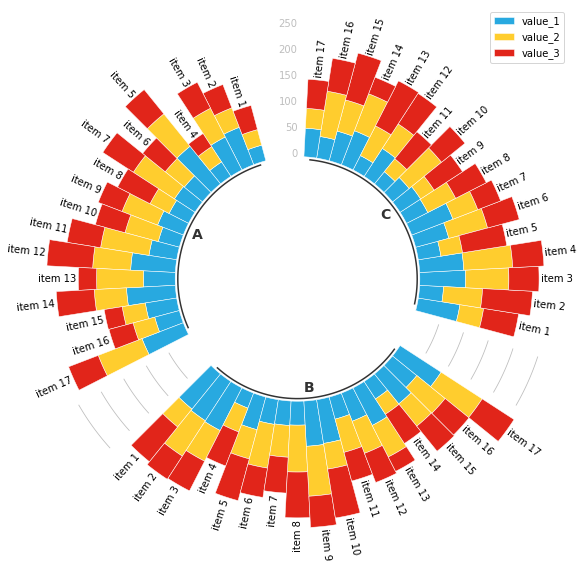

In [5]:
# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

LABELS = df["label"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(df) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# group size and label
group_size = df['group'].value_counts()\
.to_frame()\
.reset_index()\
.rename(columns = {'index':'group', 'group':'size'})\
.sort_values('group')

GROUPS_LABEL = group_size['group'].values
GROUPS_SIZE = group_size['size'].values

offset = 0
IDXS = []

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# get columns value_1, value_2, ..., value_n
l1 = df.columns
l2 = ['label','group']
itens = [x for x in l1 if x not in l2]

# colors
colors = ['#28A9E0', '#FFCD2E', '#E1251A']

# plot stacked bars
bottom = 0
for item, color in zip(itens,colors):
  VALUES = df[item].values
  ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, 
    edgecolor="white", linewidth=0.5,
    label= item,
    bottom = bottom,
    color = color
  )
  bottom += VALUES


# y limits
ax.set_ylim(-0.9*max(bottom), 1.1*max(bottom))

# add labels
add_labels(ANGLES[IDXS], bottom, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(GROUPS_LABEL, GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -25, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
       
    offset += size + PAD

# Add reference lines
offset = GROUPS_SIZE[0] + PAD # starts after the first group
for group, size in zip(GROUPS_LABEL[1:], GROUPS_SIZE[1:]):
        
    # Add reference lines at 50, 100, 150, 200 and 250
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [50] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [150] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [200] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [250] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

# Add text showing the value of each 50/150/200/250 lines
for y in [0, 50, 100, 150, 200, 250]:
  ax.text(x=0,
        y=y, 
        s=y,
        horizontalalignment='right',
        color = "#bebebe"
        ) 
    
ax.legend();

# Example: when there is a values much bigger than the others

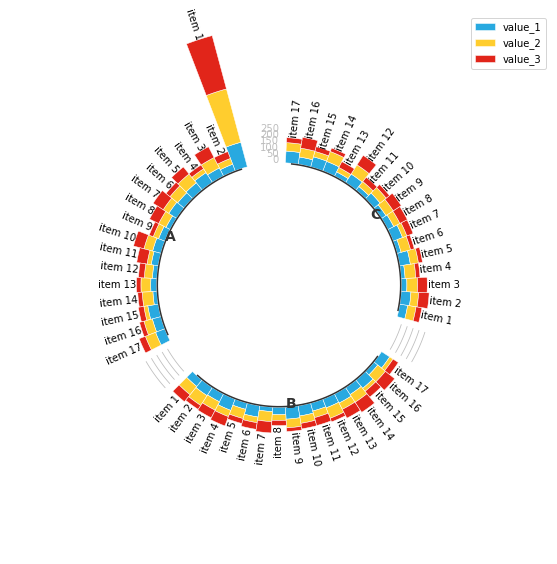

In [18]:
# Build a dataset
df = pd.DataFrame({
    "label": 3*[f"item {i}" for i in range(1, 18)],
    "value_1": rng.integers(low=30, high=100, size=51),
    "value_2": rng.integers(low=30, high=100, size=51),
    "value_3": rng.integers(low=30, high=100, size=51),
    "group": ["A"] * 17 + ["B"] * 17 + ["C"] * 17
})

# 5 times group A, item 1
df.loc[(df.group == 'A') & (df.label == 'item 1'),['value_1','value_2','value_3']] = 5*df.loc[(df.group == 'A') & (df.label == 'item 1'),['value_1','value_2','value_3']]


# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

LABELS = df["label"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(df) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# group size and label
group_size = df['group'].value_counts()\
.to_frame()\
.reset_index()\
.rename(columns = {'index':'group', 'group':'size'})\
.sort_values('group')

GROUPS_LABEL = group_size['group'].values
GROUPS_SIZE = group_size['size'].values

offset = 0
IDXS = []

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# get columns value_1, value_2, ..., value_n
l1 = df.columns
l2 = ['label','group']
itens = [x for x in l1 if x not in l2]

# colors
colors = ['#28A9E0', '#FFCD2E', '#E1251A']

# plot stacked bars
bottom = 0
for item, color in zip(itens,colors):
  VALUES = df[item].values
  ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, 
    edgecolor="white", linewidth=0.5,
    label= item,
    bottom = bottom,
    color = color
  )
  bottom += VALUES


# y limits
ax.set_ylim(-0.9*max(bottom), 1.1*max(bottom))

# add labels
add_labels(ANGLES[IDXS], bottom, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(GROUPS_LABEL, GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -25, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
       
    offset += size + PAD

# Add reference lines
offset = GROUPS_SIZE[0] + PAD # starts after the first group
for group, size in zip(GROUPS_LABEL[1:], GROUPS_SIZE[1:]):
        
    # Add reference lines at 50, 100, 150, 200 and 250
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [50] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [150] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [200] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [250] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

# Add text showing the value of each 50/150/200/250 lines
for y in [0, 50, 100, 150, 200, 250]:
  ax.text(x=0,
        y=y, 
        s=y,
        horizontalalignment='right',
        color = "#bebebe"
        ) 
    
ax.legend();

## 6. References

[1] https://www.python-graph-gallery.com/circular-barplot-with-groups 
Click on **Circular Barplot Section** and in **Grouped Circular barplot** section click on first plot **How to add a gap in a circular bar plot**

[2] https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

[3] https://www.r-graph-gallery.com/299-circular-stacked-barplot.html#:~:text=A%20circular%20barplot%20is%20a,barplot%20with%20R%20and%20ggplot2%20.&text=bar%20section%20Warning-,A%20circular%20barplot%20is%20a%20barplot%20where%20bars%20are%20displayed,circle%20instead%20of%20a%20line.
Add text showing the value of each reference line